# Project 2: Food security Analysis in Karamoja Region. 

An analysis of satellite imaging on crops grown in Karamoja area collected by Dalberg Data Insights(DDI) for the 2017 crop season.

## Introduction
Karamoja is the most food-insecure region of Uganda. One of the main reasons is the low productivity level of the crops due to intense droughts as well as pest and disease outbreaks.

In Karamoja, several NGOs provide technical support as well as farm inputs to the farmers experiencing extremely low yield. Though, they lack visibility into the overall state of the region and often need to rely on some very local sources of information to prioritize their activities. Dalberg Data Insights (DDI) has been requested to develop a new food security monitoring tool to support the decision making of one of those NGOs active in Karamoja.

To do so, Dalberg Data Insights developed a methodology to remotely measure the yield of the two main staple crops of the region (i.e. sorghum and maize) based on satellite images. The agri-tech team just ran the model for the 2017 crop season.

## Objectives

* To find out how maize crop performed in the area.
* To find out the yield of the sorghum crop in the 2017 crop season.
* To perform analysis in order to know which crop perfomed better.
* To understand reasons as to why a crop perfomed better and be able to advise accordingly.
* To make a presentation of the findings.

## Research question

* what is the total productivity of sorghum in the districts (Kg)
* What is the total productivity of the maize in the districts (Kg)
* What was the area size allocated to maize farming .
* What is area was allocated for sorghum farming .
* What is the district size versus their productivity.

## 1. Data Understanding

I will be working with a Dalberg Data Insights(DDI) data based on satellite images to measure the yield of the two main staple crops of the region (i.e. sorghum and maize).The agri-tech team just ran the model for the 2017 crop season.

The data is contained in two separate CSV files.

I chose to work with the district file because the sub-counties are all found within the districts. 

## 2. Business Understanding/ research question.

I will perform an open-ended Exploratory Data Analysis (EDA) to answer the questions:
* What area was allocated to farming of each crop.
* What is the size of each district against the land allocated for farming each crop
* What is the total productivity for the sorghum for the subcounty (Kg)
* What is the total productivity for the maize for the subcounty (Kg)

## 3. Loading the  data

In [1]:
#importing libraries to use in Exploratory data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# to visualize the data plotted in the notebook
%matplotlib inline

####    3.1   District Crop Yield Data.


In [2]:
# loading the district crop yield data as a pandas dataframe
district_df = pd.read_csv('Uganda_Karamoja_District_Crop_Yield_Population.csv')
district_df

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [3]:
#Previewing the number of rows and columnsin the dataframe
district_df.shape

(7, 11)

In [70]:
#Previewing data types contained in the district dataset
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   objectid               7 non-null      int64  
 1   name                   7 non-null      object 
 2   pop                    7 non-null      int64  
 3   area                   7 non-null      int64  
 4   s_yield_ha             7 non-null      int64  
 5   m_yield_ha             7 non-null      int64  
 6   crop_area_ha           7 non-null      float64
 7   s_area_ha              7 non-null      float64
 8   m_area_ha              7 non-null      float64
 9   s_prod_tot             7 non-null      int64  
 10  m_prod_tot             7 non-null      int64  
 11  s-percentage_area      7 non-null      float64
 12  maize-percentage_area  7 non-null      float64
dtypes: float64(5), int64(7), object(1)
memory usage: 860.0+ bytes


In [5]:
# Previewing missing values
district_df.isna().sum().sum()

0

In [6]:
#finding the statistics in the district dataset
district_df.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


#### 3.2 Visual representations 

I decided to use a barchart because I wanted to plot the districts(categorical values) against numeric values.

I also plotted a scatter plot to show correlation between two continous variables.

Finally a heatmap to show the correlation of all numeric values.

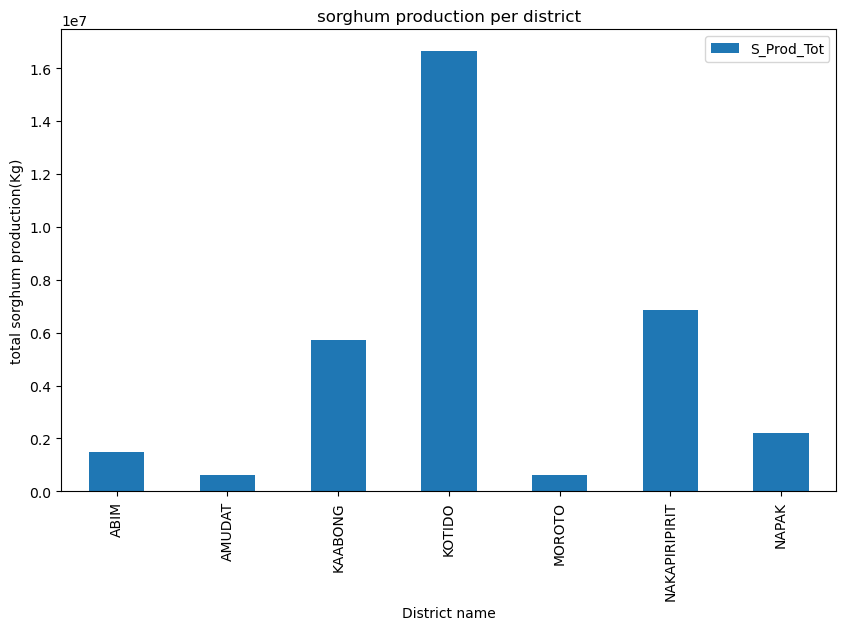

In [7]:
# a bargraph to show sorghum productivity by district
district_df.plot.bar(x= "NAME", y="S_Prod_Tot", figsize=(10, 6))

plt.xlabel("District name")
plt.ylabel("total sorghum production(Kg)")
plt.title("sorghum production per district")
plt.show()

In [64]:
"""
Kotido district produced the most sorghum amounting to 16631904kg, followed by Nakapiripirit at 8122197kg, then Kaabong5731830kg, Napak 2211456kg,
Abim 1471506kg, Amudat 609552kg. Moroto district had the least sorghum production amounting to 606944 kgs
"""


'\nKotido district produced the most sorghum amounting to 16631904kg, followed by Nakapiripirit at 8122197kg, then Kaabong5731830kg, Napak 2211456kg,\nAbim 1471506kg, Amudat 609552kg. Moroto district had the least sorghum production amounting to 606944 kgs\n'

In [10]:
district_df['M_Prod_Tot'].sort_values(ascending= False)

5    8122197
2    6987723
6    5588336
1    3545558
3    2010575
0    1922567
4     422468
Name: M_Prod_Tot, dtype: int64

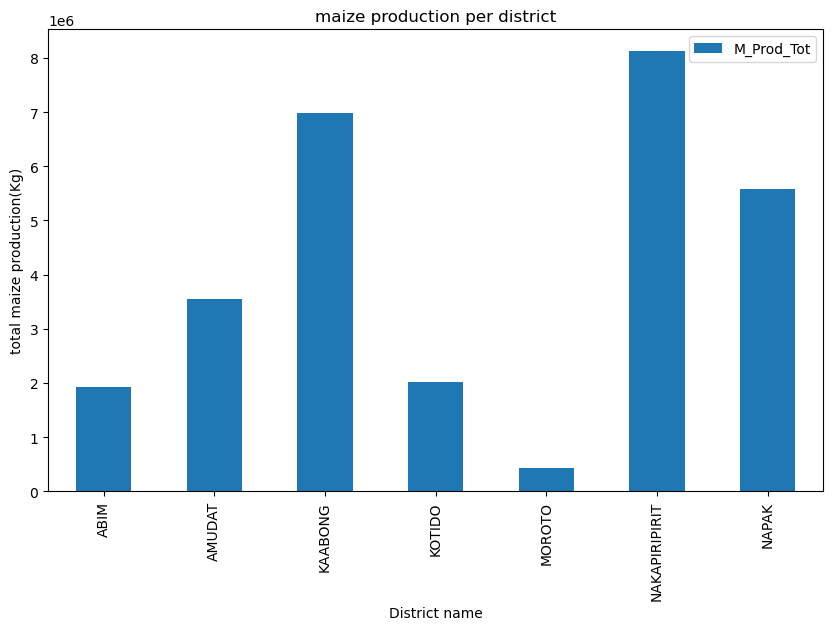

In [12]:
# a bargraph to show maize productivity by district
district_df.plot.bar(x= "NAME", y="M_Prod_Tot", figsize=(10, 6))

plt.xlabel("District name")
plt.ylabel("total maize production(Kg)")
plt.title("maize production per district")
plt.show()

In [13]:
"""
Nakapiripirit district produced the most maize amounting to 8122197 kgs, then Kaabong produced 6987723 kgs, Napak produced 5588336 kgs,
Amudat 3545558 kgs, Abim 2010575 kgs ,Moroto had the least maize prodeced amounting to 422468 kgs
"""

'\nNakapiripirit district produced the most maize amounting to 8122197 kgs, then Kaabong produced 6987723 kgs, Napak produced 5588336 kgs,\nAmudat 3545558 kgs, Abim 2010575 kgs ,Moroto had the least maize prodeced amounting to 422468 kgs\n'

In [15]:
district_df['Area'].sort_values(ascending= False)

2    7373606003
6    4508782023
5    4216323900
3    3641539808
4    3570160948
0    2771977106
1    1643582836
Name: Area, dtype: int64

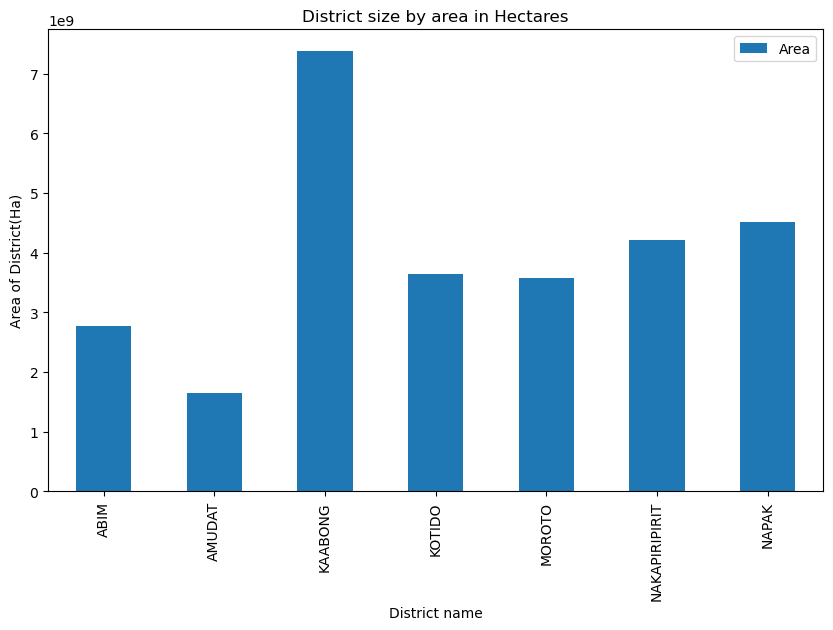

In [17]:
# a bargraph to district in terms of area size
district_df.plot.bar(x= "NAME", y="Area", figsize=(10, 6))

plt.xlabel("District name")
plt.ylabel("Area of District(Ha)")
plt.title("District size by area in Hectares")
plt.show()

In [18]:
"""
Kaabong district is the largest at 7373606003 Ha ,then Napak at 4508782023, Nakapiripirit is 4216323900, Kotido is 3641539808,
Moroto is 3570160948, Abim is 2771977106,Amudat is the smallest district with size of 1643582836 Ha.
"""

'\nKaabong district is the largest at 7373606003 Ha ,then Napak at 4508782023, Nakapiripirit is 4216323900, Kotido is 3641539808,\nMoroto is 3570160948, Abim is 2771977106,Amudat is the smallest district with size of 1643582836 Ha.\n'

In [19]:
district_df['POP'].sort_values(ascending= False)

2    627057
3    243157
6    167625
5    146780
4    127811
1    101790
0     90385
Name: POP, dtype: int64

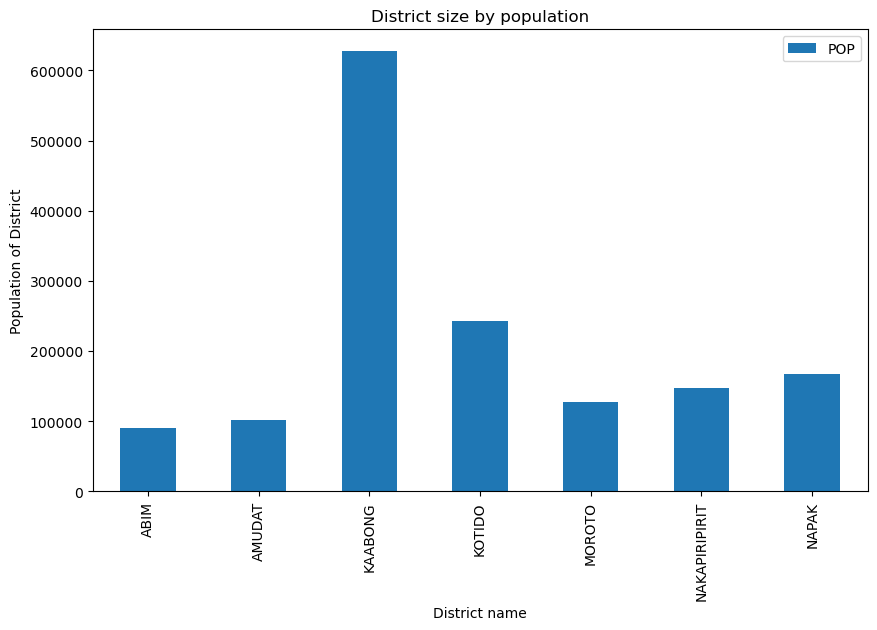

In [20]:
# a bargraph to district in terms of population
district_df.plot.bar(x= "NAME", y="POP", figsize=(10, 6))

plt.xlabel("District name")
plt.ylabel("Population of District")
plt.title("District size by population")
plt.show()

In [21]:
"""
Kaabong is the most populated district with a population of 627057 ,then Kotido at243157 , Napak at 167625, Nakapiripirit at 146780 ,
Moroto at 127811, Amudat at 101790, Abim is the least populated at 90385.
"""


'\nKaabong is the most populated district with a population of 627057 ,then Kotido at243157 , Napak at 167625, Nakapiripirit at 146780 ,\nMoroto at 127811, Amudat at 101790, Abim is the least populated at 90385.\n'

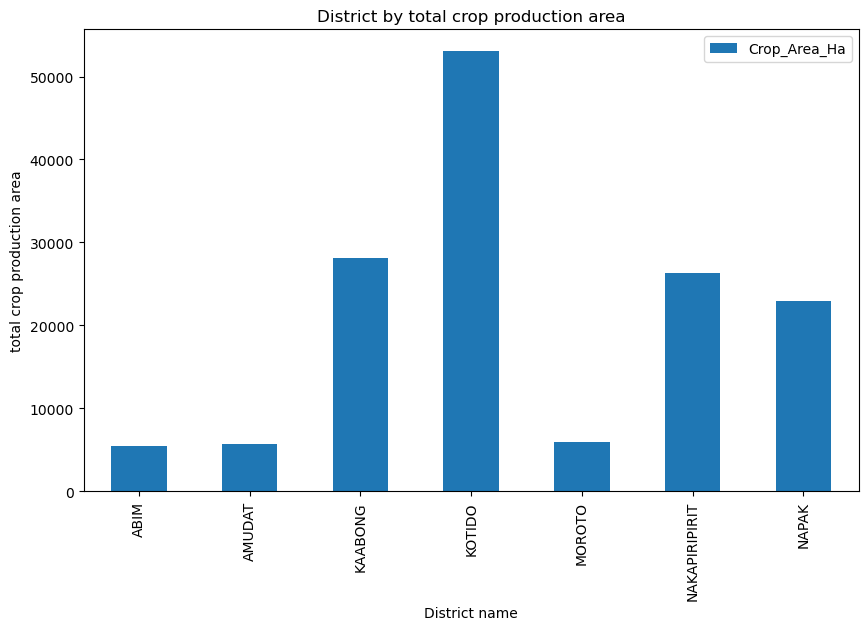

In [24]:
# a bargraph to district in terms of total crop production area
district_df.plot.bar(x= "NAME", y="Crop_Area_Ha", figsize=(10, 6))
plt.xlabel("District name")
plt.ylabel("total crop production area")
plt.title("District by total crop production area")
plt.show()

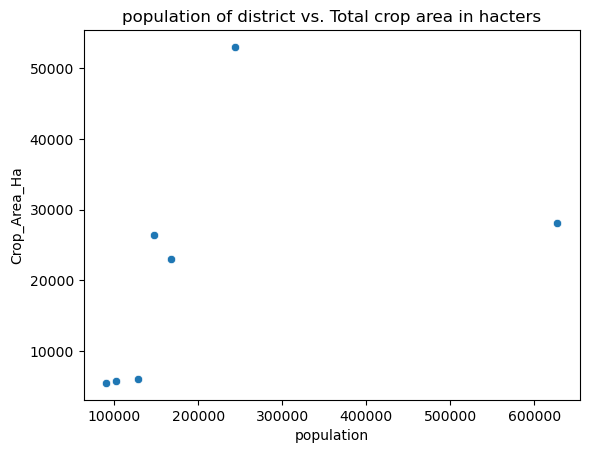

In [25]:
ax = sns.scatterplot(x="POP", y="Crop_Area_Ha", data=district_df)
ax.set_title("population of district vs. Total crop area in hacters")
ax.set_xlabel("population")
plt.show()

In [26]:
"""
There's no correlation between population of a district and the area used for crop farming.
"""

"\nThere's no correlation between population of a district and the area used for crop farming.\n"

In [27]:
#selecting numeric columns
numeric_columns= district_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['OBJECTID', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha',
       'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [28]:
#showing corellations between the numeric columns
corr_numeric_columns=district_df[numeric_columns].corr()
corr_numeric_columns

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,1.000000,-0.474371,-0.602633,0.352307,0.696278,0.079865,0.107743,-0.196739,0.132700,-0.078300
POP,-0.474371,1.000000,0.891900,0.024405,-0.032883,0.424930,0.353520,0.562697,0.300750,0.442555
Area,-0.602633,0.891900,1.000000,-0.036377,-0.212716,0.410245,0.310478,0.729935,0.224938,0.574620
S_Yield_Ha,0.352307,0.024405,-0.036377,1.000000,0.565185,0.206778,0.215317,-0.073130,0.370599,0.104401
M_Yield_Ha,0.696278,-0.032883,-0.212716,0.565185,1.000000,0.300017,0.268343,0.212479,0.356662,0.449512
Crop_Area_Ha,0.079865,0.424930,0.410245,0.206778,0.300017,1.000000,0.988370,0.233298,0.952850,0.252674
S_Area_Ha,0.107743,0.353520,0.310478,0.215317,0.268343,0.988370,1.000000,0.083128,0.976447,0.108703
M_Area_Ha,-0.196739,0.562697,0.729935,-0.073130,0.212479,0.233298,0.083128,1.000000,-0.008665,0.946280
S_Prod_Tot,0.132700,0.300750,0.224938,0.370599,0.356662,0.952850,0.976447,-0.008665,1.000000,0.074169
M_Prod_Tot,-0.078300,0.442555,0.574620,0.104401,0.449512,0.252674,0.108703,0.946280,0.074169,1.000000


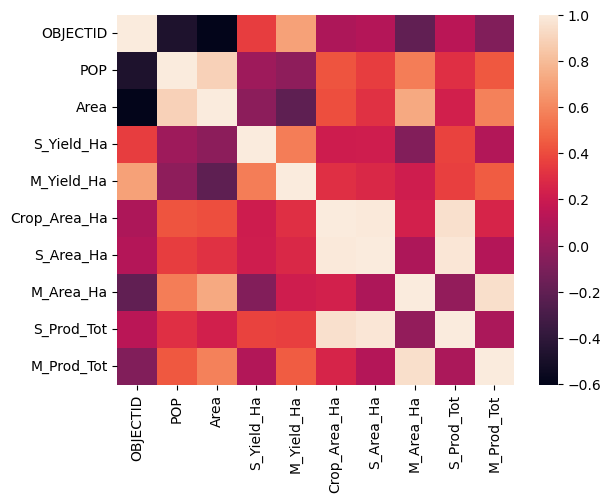

In [29]:
# heatmap of correlation of numeric values in the district dataframe
sns.heatmap(corr_numeric_columns)
plt.show()

## 4. Engineering a new feature

To calculate the percentage area that was allocated to plant the two crops against the total area set for crop farming.

In [30]:
# percentage area of crop production in each district
def crop_percentage(column1, column2):
    (column1/column2)*100
    return crop_percentage

In [31]:
district_df['S-percentage_Area']= district_df['S_Area_Ha']/ district_df['Crop_Area_Ha'] *100
district_df['S-percentage_Area']

0    59.913254
1    51.573201
2    73.054670
3    94.748130
4    79.628830
5    72.944121
6    70.353067
Name: S-percentage_Area, dtype: float64

In [32]:
district_df['Maize-percentage_Area']= district_df['M_Area_Ha']/ district_df['Crop_Area_Ha'] *100
district_df['Maize-percentage_Area']

0    33.795224
1    47.414582
2    26.294369
3     3.302442
4    19.984681
5    24.365305
6    28.520025
Name: Maize-percentage_Area, dtype: float64

In [33]:
district_df.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S-percentage_Area,Maize-percentage_Area
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,59.913254,33.795224
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,51.573201,47.414582
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,73.054670,26.294369
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,94.748130,3.302442
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,79.628830,19.984681


In [68]:
# changing the columns into lower 
# because they are in mixed case
district_df.columns = district_df.columns.str.lower()
district_df.columns


Index(['objectid', 'name', 'pop', 'area', 's_yield_ha', 'm_yield_ha',
       'crop_area_ha', 's_area_ha', 'm_area_ha', 's_prod_tot', 'm_prod_tot',
       's-percentage_area', 'maize-percentage_area'],
      dtype='object')

In [35]:
district_df

,objectid,name,pop,area,s_yield_ha,m_yield_ha,crop_area_ha,s_area_ha,m_area_ha,s_prod_tot,m_prod_tot,s-percentage_area,maize-percentage_area
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,59.913254,33.795224
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,51.573201,47.414582
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,73.054670,26.294369
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,94.748130,3.302442
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,79.628830,19.984681
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197,72.944121,24.365305
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336,70.353067,28.520025


#### 2. Subcounty Crop Yield Data

I didn't analyse the subcounty data because, all the subcounties are within the districts.

In [36]:
# loading the sub_county crop yields as a pandas dataframe
subcounty_df = pd.read_csv('Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
# previewing the first five rows
subcounty_df.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [37]:
# Previewing rows and columns
subcounty_df.shape

(52, 13)

In [38]:
# finding out if there are any missing values
subcounty_df.isna().sum().sum()

0

In [39]:
# Previewing datatypes
subcounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [40]:
# dropping the Karamoja column because the values don't make sense.
subcounty_df.drop('Karamoja', axis=1, inplace=True)
#previewing columns after dropping the karamoja column
subcounty_df.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [58]:
# number of districts in the subcounty dataframe
District_value_counts = subcounty_df["DISTRICT_NAME"].value_counts()
len(District_value_counts)

7

## 5. Conclussion

After the data analysis, it is clear to see that the crop most planted in the Karamoja area is Sorghum since a bigger percentage of the crop area has been set aside for growing the crop. It may be due to adaptability of the sorghum crop being that it is a hardy crop or also maybe, its what the community is used to growing over the years.


I found that the maize crop generally did fairly well than despite being given less priority in the percentage of crop growing area allocated to the maize crop.

## 6. Reccomendation

1. I would reccomend that the NGO's would educate farmers in the Karamoja area do more maize farming, allocate more crop area to maize farming.
2. I would reccomend that the NGO's educate and provide farmers with necessary tools to diversify production instead of depending on maize and sorghum.
3. Because sorghum seems to do well in the region, i would reccomend the districts with low maize productivity to be encouraged to do more sorghum farming.
4. I would reccomend the NGO's to focus on districts with low productivity like Moroto districts by encouraging other methods of farming that is not reliant on the weather patterns.
5. I would also reccomend that large Districts like Kaabong and Napak, be allocated more farming resources in order to boost productivity and enhance food security in the Karamoja region.